<a href="https://colab.research.google.com/github/Kxrishx03/restaurantreviewfirstMLproject/blob/main/resturantanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sentiment Analysis of Resturants reviews.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd

# Connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
df = pd.read_excel('/content/drive/MyDrive/Dataset/review.xlsx')

In [ ]:
df.shape

(1000, 2)

In [ ]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [ ]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
df.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

Preprocessing Dataset

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', repl=' ', string = str(df['Review'][i]))
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[0:1500]

Vectorization

In [ ]:
# Creating the Bag of Words model using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

Training and Classification

Using Multinomial Naive Bayes classifiction algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2*100,2))
print("Recall is ",round(score3*100,2))



Accuracy is  75.5 %
Precision is  75.0
Recall is  78.64


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[70 27]
 [22 81]]


Text(95.72222222222221, 0.5, 'Actual Values')

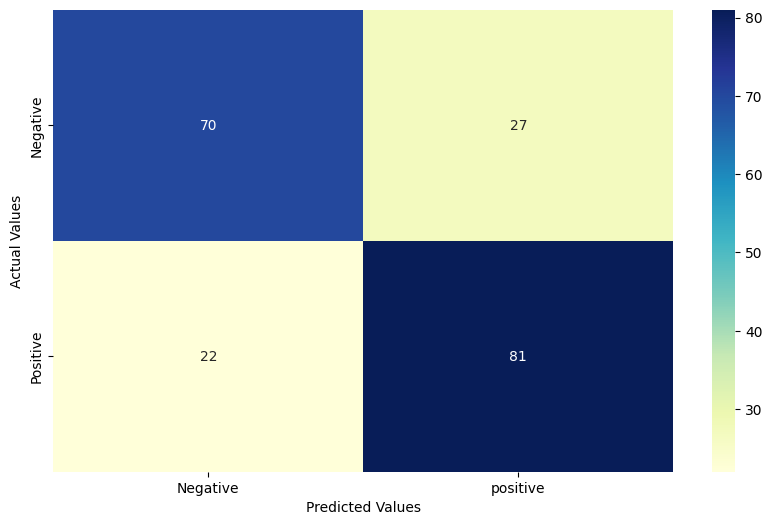

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=["Negative","positive"],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [ ]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test,temp_y_pred)
  print("Accuracy score for alpha = {} is : {}%".format(round(i,1),round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i

print("---------------------------------------------------------------------------------------")
print("The best accuracy is {}% with alpha value as {}".format(round(best_accuracy*100,2),round(alpha_val,1)))



Accuracy score for alpha = 0.1 is : 77.5%
Accuracy score for alpha = 0.2 is : 78.0%
Accuracy score for alpha = 0.3 is : 77.5%
Accuracy score for alpha = 0.4 is : 77.5%
Accuracy score for alpha = 0.5 is : 76.5%
Accuracy score for alpha = 0.6 is : 76.5%
Accuracy score for alpha = 0.7 is : 76.5%
Accuracy score for alpha = 0.8 is : 75.5%
Accuracy score for alpha = 0.9 is : 75.5%
Accuracy score for alpha = 1.0 is : 75.5%
---------------------------------------------------------------------------------------
The best accuracy is 78.0% with alpha value as 0.2


In [ ]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

Predictions

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string =sample_review)
  sample_review  = sample_review .lower()
  sample_review_words  = sample_review .split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)



In [ ]:
#Predicted values
sample_review = 'The food is really good'

if predict_sentiment(sample_review):
  print("This is a POSITIVE review")
else:
  print("This is a NEGATIVE review")

This is a POSITIVE review


In [ ]:
#Predicted values
sample_review = 'The food is really bad'

if predict_sentiment(sample_review):
  print("This is a POSITIVE review")
else:
  print("This is a NEGATIVE review")

This is a NEGATIVE review
